In [4]:
from google.colab import drive

#mount drive
drive.mount('/content/drive')
#locate the file in google drive
path = '/drive/My Drive/dataset_equip_inf'

Mounted at /content/drive


In [5]:
#show numbers image every class
!ls /content/drive/MyDrive/dataset_equip_inf/gabinetes/ | wc -l
!ls /content/drive/MyDrive/dataset_equip_inf/impressoras/ | wc -l
!ls /content/drive/MyDrive/dataset_equip_inf/laptops/ | wc -l
!ls /content/drive/MyDrive/dataset_equip_inf/monitors/ | wc -l
!ls /content/drive/MyDrive/dataset_equip_inf/mouses/ | wc -l
!ls /content/drive/MyDrive/dataset_equip_inf/teclados/ | wc -l

82
86
80
108
102
105


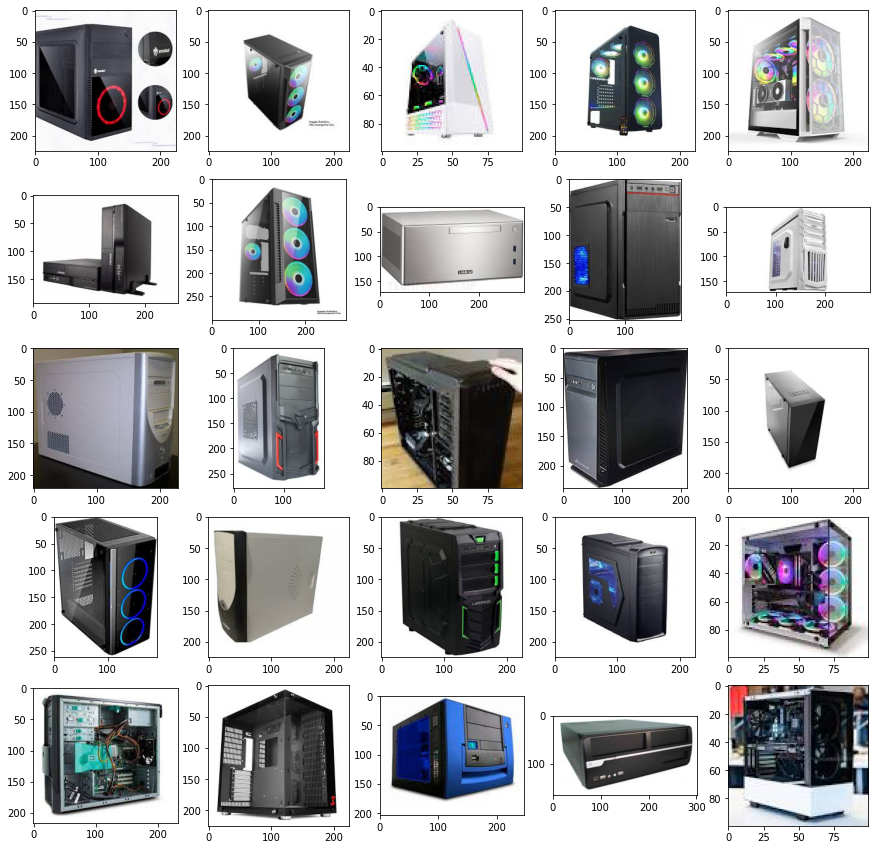

In [6]:
#show some image from folder
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
gabinetes = '/content/drive/MyDrive/dataset_equip_inf/gabinetes/'
img_gabinetes = os.listdir(gabinetes)

for i, nameimg in enumerate(img_gabinetes[:25]):
  plt.subplot(5,5,i+1)
  img = mpimg.imread(gabinetes + '/' + nameimg)
  plt.imshow(img)


Found 446 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


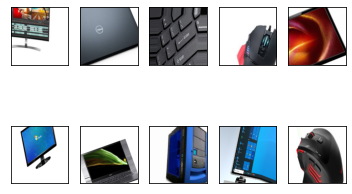

In [7]:
#data augmentations with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#create data generator
datagen = ImageDataGenerator(
    rescale = 1. /255, #val between 0 and 1, not between 0 and 255
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split = 0.2 #20% for data test
)

#generators for training and validation data
datagen_training = datagen.flow_from_directory('/content/drive/MyDrive/dataset_equip_inf/', 
                                               target_size = (224,224), batch_size = 32,
                                               shuffle = True, subset = 'training'
                                               )
datagen_validation = datagen.flow_from_directory('/content/drive/MyDrive/dataset_equip_inf/', 
                                               target_size = (224,224), batch_size = 32,
                                               shuffle = True, subset = 'validation'
                                               )
#print 10 image from training subset
for image, label in datagen_training:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[i])
  break
plt.show()